In [ ]:
# Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import tensorflow as tf

In [ ]:
# Parameters

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
EPOCHS = 100
# we are not defining alpha because it is predefined in the optimizer


TEST_SIZE = 0.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine.csv', header=None)
data_df.shape

(178, 14)

In [ ]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
# This is our target column (data_dfs last column)
data_df.iloc[:,-1].value_counts()

13
2    71
1    59
3    48
Name: count, dtype: int64

In [ ]:
	# 1) Alcohol
 	# 2) Malic acid
 	# 3) Ash
	# 4) Alcalinity of ash
 	# 5) Magnesium
	# 6) Total phenols
 	# 7) Flavanoids
 	# 8) Nonflavanoid phenols
 	# 9) Proanthocyanins
	# 10)Color intensity
 	# 11)Hue
 	# 12)OD280/OD315 of diluted wines
 	# 13)Proline

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [ ]:
for col in data_df.columns:
  print(f'col: {col} | {data_df[col].unique()}')

col: 0 | [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
col: 1 | [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.

In [ ]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
# Ash content in wine is the inorganic residue remaining after the complete combustion of the organic matter in wine.
# Proline is an amino acid found in grapes and wine.
# It is one of the most abundant amino acids in wine.

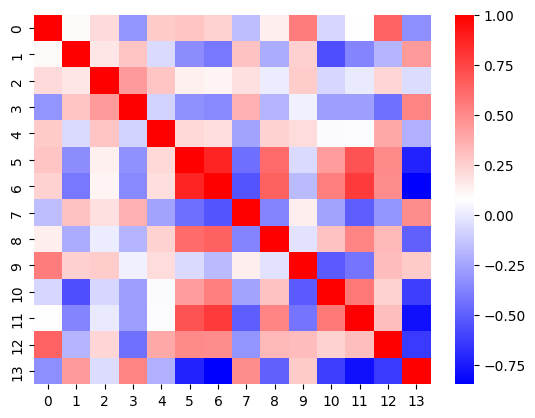

In [ ]:
sns.heatmap(data_df.corr(), cmap = 'bwr');

In [ ]:
labels = data_df[data_df.columns[-1]]
labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 13, Length: 178, dtype: int64

In [ ]:
features_df = data_df.drop(data_df.columns[-1], axis = 1)
features_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels,
                                                    shuffle=True,
                                                    stratify = labels,
                                                    test_size = TEST_SIZE,
                                                    random_state = RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174, 13), (4, 13), (174,), (4,))

In [ ]:
sc = StandardScaler()
le = LabelEncoder()

X_train = sc.fit_transform(X_train) # fit_transform on train
X_test = sc.transform(X_test)       # only transform on test


# le. and sc. always transform the data into numpy.ndarray thus typecasting it to numpy after encoding is not necessary
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
type(y_test)

numpy.ndarray

In [ ]:
# add a '?' to know about the details of the library
tf.keras.layers.Dense?

In [ ]:
tf.keras.Sequential?

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8, activation='relu',
                                kernel_regularizer = None)) # tf.nn.silu = sigmoid linear unit(swish) [alternatively activation can e anything else (tanh, sigmoid etc.)]

model.add(tf.keras.layers.Dense(3))

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit?

In [ ]:
#batchsize by default is 32
hist = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=[X_test, y_test])

Epoch 1/100
6/6 [==============================] - 2s 81ms/step - loss: 1.1588 - accuracy: 0.3563 - val_loss: 1.0402 - val_accuracy: 0.5000
Epoch 2/100
6/6 [==============================] - 0s 33ms/step - loss: 1.1152 - accuracy: 0.4080 - val_loss: 0.9983 - val_accuracy: 0.7500
Epoch 3/100
6/6 [==============================] - 0s 24ms/step - loss: 1.0740 - accuracy: 0.4368 - val_loss: 0.9583 - val_accuracy: 0.7500
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 1.0354 - accuracy: 0.4655 - val_loss: 0.9187 - val_accuracy: 0.7500
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.9977 - accuracy: 0.4885 - val_loss: 0.8817 - val_accuracy: 0.7500
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 0.9624 - accuracy: 0.5115 - val_loss: 0.8462 - val_accuracy: 0.7500
Epoch 7/100
6/6 [==============================] - 0s 24ms/step - loss: 0.9288 - accuracy: 0.5460 - val_loss: 0.8123 - val_accuracy: 0.7500
Epoch 8/100
6/6 [===

In [ ]:
loss_df = pd.DataFrame(hist.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.158780,0.356322,1.040160,0.50
1,1.115171,0.408046,0.998296,0.75
2,1.074010,0.436782,0.958330,0.75
3,1.035383,0.465517,0.918713,0.75
4,0.997720,0.488506,0.881694,0.75


<Axes: >

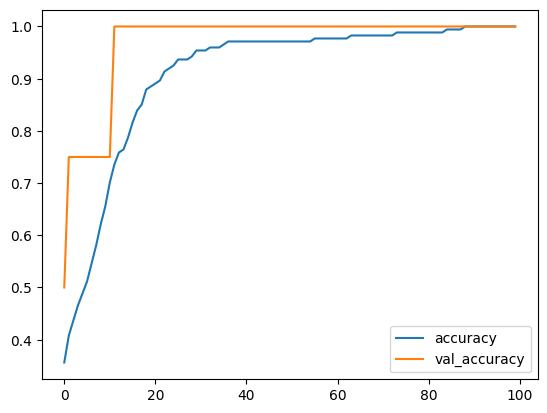

In [ ]:
loss_df.plot(y = ['accuracy', 'val_accuracy'])

<Axes: >

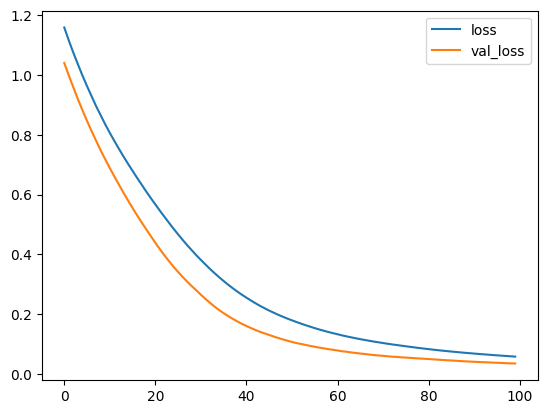

In [ ]:
loss_df.plot(y = ['loss', 'val_loss'])

In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

1/1 [==============================] - 0s 133ms/step


(4, 3)

In [ ]:
y_pred.argmax(axis=1)

array([1, 2, 0, 1])

In [ ]:
accuracy_score(y_test, y_pred.argmax(axis=1))

1.0

In [ ]:
confusion_matrix(y_test, y_pred.argmax(axis=1))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 1]])

In [ ]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

